In [105]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.integrate as integrate

from zhang_1996.head_direction_network import asymptotic_symmetric_weight, discrete_time_approximation
from zhang_1996.utils import sigmoid, inverse_sigmoid, directional_tuning

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
a = 6.34
b = 10
c = 0.5
beta = 0.8
K = 8
A = 1
f_max = 40 

B = (f_max - A) / np.exp(K)

In [43]:
theta = np.linspace(-np.pi, np.pi, num=80, endpoint=True)

In [133]:
W, lmd0 = asymptotic_symmetric_weight(theta, a, b, c, beta, A, B, K, lmd0=1e-3, norm="forward")

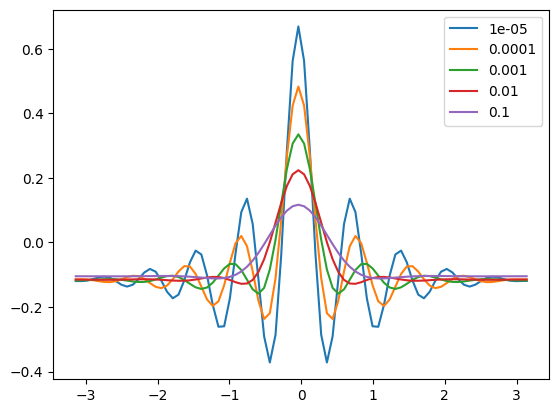

In [134]:
for lmd0 in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
    W_temp, lmd0 = asymptotic_symmetric_weight(theta, a, b, c, beta, A, B, K, lmd0=lmd0, norm="forward")
    plt.plot(theta, W_temp, label=f"{lmd0:.2}")
    plt.legend()

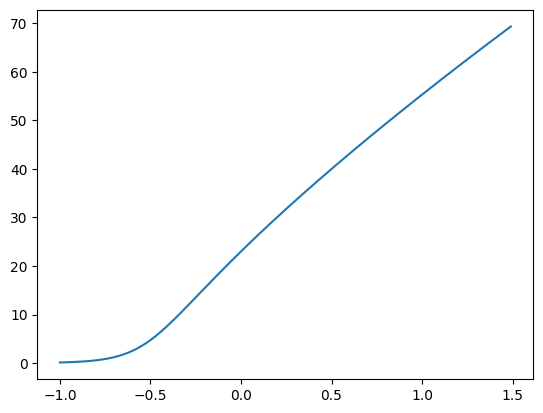

In [139]:
plt.plot(np.arange(-1.0, 1.5, 0.01), sigmoid(a, b, c, beta, np.arange(-1.0, 1.5, 0.01)))

In [140]:
f_init = np.random.uniform(0, 5, size=(len(theta), ))
# f_init = np.zeros((len(theta), ))


u_arr, f_arr = discrete_time_approximation(
    theta=theta, 
    f_init=f_init, 
    dt=10, 
    T=8000, 
    a=a, 
    b=b, 
    c=c, 
    beta=beta, 
    A=A, 
    B=B, 
    K=K, 
    lmd0=1e-3, 
    norm="forward"
)

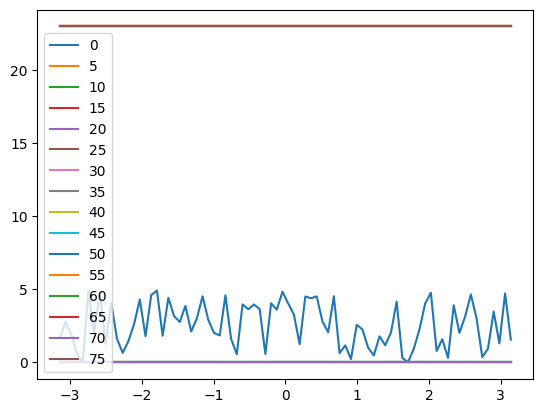

In [141]:
for i in np.arange(0, 80, 5):
    plt.plot(theta, f_arr[i], label=str(i))
plt.legend()